In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pint; from pint import Quantity as AssignQuantity

In [2]:
%matplotlib notebook

In [3]:
xvalues = np.linspace(-50,50,200)
xvalues = AssignQuantity(xvalues,'micrometer')
dx = xvalues[1]-xvalues[0]
xrange = np.max(xvalues)-np.min(xvalues)

lambda1 = 5 micrometer
lambda2 = 20 micrometer
k1 =  0.2 / micrometer
k2 =  0.05 / micrometer


<IPython.core.display.Javascript object>


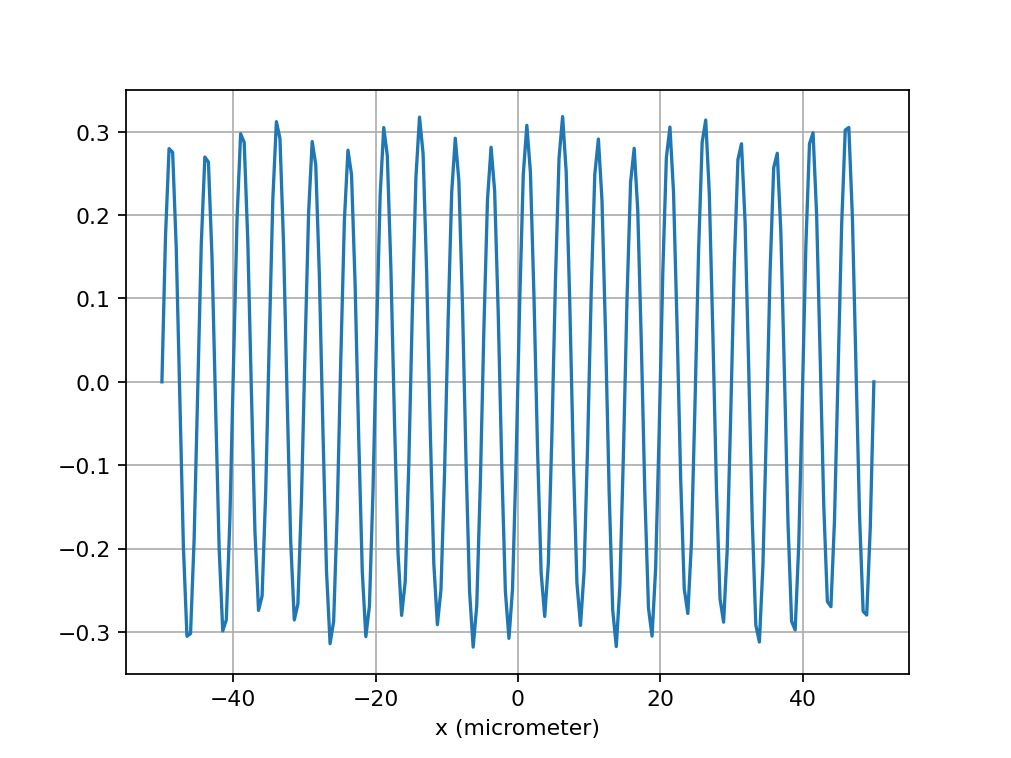

Text(0.5, 0, 'x (micrometer)')

In [8]:
lambda1 = AssignQuantity(5,'micrometer'); amp_lambda1 = AssignQuantity(.3,'micrometer')
print('lambda1 =', lambda1)
lambda2 = AssignQuantity(20,'micrometer'); amp_lambda2 = AssignQuantity(.02,'micrometer')
print('lambda2 =', lambda2)
k1 = 1/lambda1; print('k1 = ', k1)
k2 = 1/lambda2; print('k2 = ', k2)
hvalues = amp_lambda1*np.sin(xvalues*k1*2*np.pi)+amp_lambda2*np.sin(xvalues*k2*2*np.pi)

plt.figure()
plt.plot(xvalues,hvalues)
plt.grid(True)
plt.xlabel('x ('+str(xvalues.units)+')')

<IPython.core.display.Javascript object>


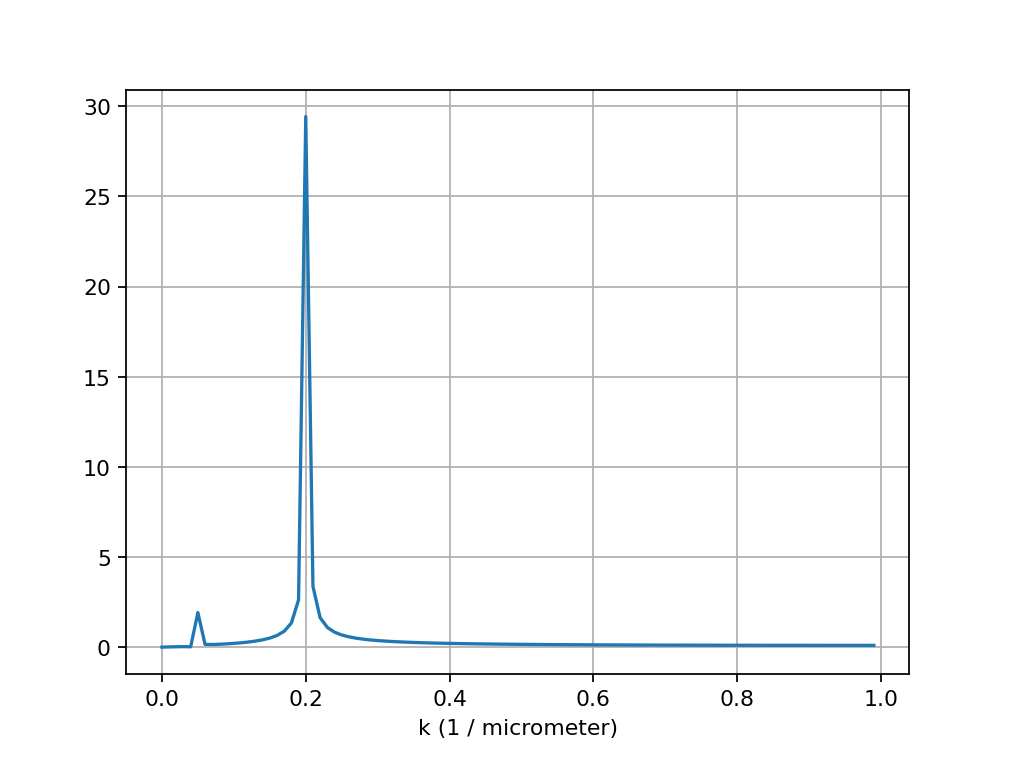

Found a peak at k = 0.2 / micrometer
Corresponding to lambda = 5.0 micrometer


In [6]:
Hvalues = np.fft.fft(hvalues.magnitude)
dk = 1/xrange.magnitude
kmax = 1/(2*dx.magnitude)
kvalues = np.arange(0,kmax,dk)
kvalues = AssignQuantity(kvalues,1/xvalues.units)
plt.figure()
length_of_unique_H = int(len(Hvalues)/2)
powerspec = np.abs(Hvalues[0:length_of_unique_H])
plt.plot(kvalues,powerspec)
plt.grid(True)
plt.xlabel('k ('+str(kvalues.units)+')')

# Reporting the max
imax = np.argmax(powerspec)
kmax = kvalues[imax]
lambdamax = 1/kmax
print('Found a peak at k =',kmax)
print('Corresponding to lambda =',lambdamax)